<a href="https://colab.research.google.com/github/feuziq47/DL/blob/master/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/My Drive/DeepLearn

[Errno 2] No such file or directory: 'gdrive/My Drive/DeepLearn'
/content/gdrive/My Drive/DeepLearn


In [0]:
!git config --global user.name "feuziq47"

In [0]:
!git clone https://github.com/feuziq47/DeepLearn.git

Cloning into 'DeepLearn'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [0]:
!git push origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
# softmax function의 구현
def softmax(a):
  exp_a=np.exp(a)
  sum_exp_a=np.sum(exp_a)
  y=exp_a/sum_exp_a
  return y

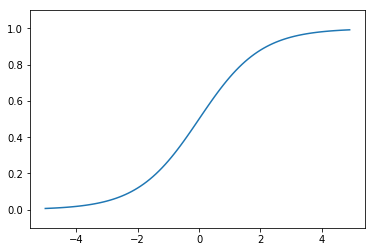

In [0]:
#Sigmoid Function 구현 및 시각화
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))
X=np.arange(-5.0,5.0,0.1)
Y=sigmoid(X)
plt.plot(X,Y)
plt.ylim(-0.1,1.1)
plt.show()

In [0]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255

x_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

In [0]:
print(y_train[:])

[5 0 4 ... 5 6 8]


In [0]:
# 기학습된 모델 import 및 함수 정의
import pickle
import numpy as np

def init_network():
  with open("sample_weight.pkl",'rb') as f:
    network=pickle.load(f)
  return network

In [0]:
# predict 함수구현
def predict(network,x):
  W1,W2,W3=network['W1'],network['W2'],network['W3']
  b1,b2,b3=network['b1'],network['b2'],network['b3']
  
  a1=np.dot(x,W1)+b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(z2,W3)+b3
  y=softmax(a3)
  
  return y

In [0]:
# 모델 구현 및 Predict
network=init_network()
accuracy_cnt=0
for i in range(len(x_train)):
  y=predict(network,x_train[i])
  p=np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻음
  if p==y_train[i]:
    accuracy_cnt+=1
print("Accuracy:"+str(float(accuracy_cnt)/len(x_train)))

Accuracy:0.9357666666666666


In [0]:
print(network['W3'].shape)

(100, 10)


In [0]:
# Batch 처리
import time
network=init_network()
batch_size=100
accuracy_cnt=0
start_time=time.time();
for i in range(0,len(x_train),batch_size):
  x_batch=x_train[i:i+batch_size]
  y_batch=predict(network,x_batch)
  p=np.argmax(y_batch,axis=1)
  accuracy_cnt+=np.sum(p==y_train[i:i+batch_size])
print("Accuracy:"+str(float(accuracy_cnt)/len(x_train)),time.time()-start_time)

Accuracy:0.9357666666666666 0.38004064559936523


In [0]:
# MSE(Mean Square Error) 함수 정의
def mean_squared_error(y,t):
  return 0.5*np.sum((y-t)**2)

In [0]:
# MSE 사용예
t=np.zeros(10)
t[2]=1
y=[0.1,0.05,0.6,0,0.01,0,0,0,0,0.2]
mean_squared_error(np.array(y),np.array(t))

0.10630000000000002

In [0]:
# CEE(Cross Entropy Error) 함수 정의
def cross_entropy_error(y,t):
  delta=1e-7
  return -np.sum(t*np.log(y+delta))

In [0]:
# CEE 사용예
t=np.zeros(10)
t[2]=1
y=[0.1,0.05,0.9,0,0.01,0,0,0,0,0.2]
cross_entropy_error(np.array(y),np.array(t))

0.1053604045467214

In [0]:
# batch CEE 함수 정의
def cross_entropy_error(y,t):
  if y.ndim==1:  # batch 데이터가 아닌 경우
    t=t.reshape(1,t.size)
    y=y.reshape(1,y.size)
  batch_size=y.shape[0]
  return -np.sum(t*np.log(y))/batch_size
    

In [0]:
# Gradient Descent 함수 정의
def numerical_gradient_no_batch(f,x):
  h=1e-4
  grad=np.zeros_like(x)
  
  for idx in range(x.size):
    tmp_val=x[idx]
    
    #f(x+h) 계산
    x[idx]=float(tmp_val)+h
    fxh1=f(x)
    #f(x-h) 계산
    x[idx]=float(tmp_val)-h
    fxh2=f(x)
    
    grad[idx]=(fxh1-fxh2)/(2*h)
    x[idx]=tmp_val #값 복원
  return grad

In [0]:
# Gradient Descent batch 함수 정의
def numerical_gradient(f,X):
  if X.ndim==1:
    return numerical_gradient_no_batch(f,X)
  else:
    grad=np.zeros_like(X)
    
    for idx,x in enumerate(X):
      grad[idx]=numerical_gradient_no_batch(f,x)
    return grad

In [0]:
# Gradient 줄이는 함수
def gradient_descent(f,init_x,lr=0.01,step_num=100):
  x= init_x
  
  for i in range(step_num):
    grad=numerical_gradient(f,x)
    x-=lr*grad
  return x

In [0]:
# example f 정의
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [0]:
# gradient descent 사용예
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

W0723 06:36:41.348159 140006752319360 legend.py:1289] No handles with labels found to put in legend.


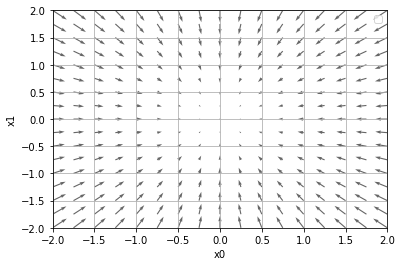

In [0]:
#function_2 함수 그리기
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

Text(0, 0.5, 'X1')

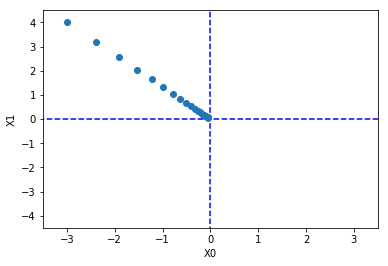

In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")


In [0]:
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

In [0]:
# 2Layer Neural Network를 class로 구현
import numpy as np
def sigmoid_grad(x):
  return (1.0-sigmoid(x))*sigmoid(x)

class TwoLayerNet:
  def __init__(self, input_size, hidden_size,output_size,weight_init_std=0.01):
    self.params={}
    self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
    self.params['b1']=np.zeros(hidden_size)
    self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
    self.params['b2']=np.zeros(output_size)
  def predict(self,x):
    W1,W2= self.params['W1'],self.params['W2']
    b1,b2= self.params['b1'],self.params['b2']
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    y=softmax(a2)
    
    return y
  # x:입력 데이터, t:정답 데이터
  def loss(self,x,t):
    y=self.predict(x)
    return cross_entropy_error(y,t)
  def accuracy(self,x,t):
    y=self.predict(x)
    y=np.argmax(y,axis=1)
    t=np.argmax(t,axis=1)
    
    accuracy=np.sum(y==t)/float(x.shape[0])
    return accuracy
  
  #x:입력 데이터, y:정답 데이터
  def numerical_gradient(self,x,t):
    loss_W=lambda W: self.loss(x,t)
    
    grads={}
    grads['W1']=numerical_gradient(loss_W,self.params['W1'])
    grads['b1']=numerical_gradient(loss_W,self.params['b1'])
    grads['W2']=numerical_gradient(loss_W,self.params['W2'])
    grads['b2']=numerical_gradient(loss_W,self.params['b2'])
    return grads
    

In [0]:
# 학습 알고리즘 구현
# Mini Batch를 통한 학습
# categorical : one-hot encoding을 해준다.

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255

x_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

#하이퍼파라미터
iters_num=100 #반복 횟수 설정
train_size=x_train.shape[0]
batch_size=100 #묶음의 크기
learning_rate=0.1

train_loss_list=[] # 학습 과정 중 loss값의 변화 list
train_acc_list=[]  # 학습 과정 중 accuracy값의 변화 list
test_acc_list=[]   # test중 accuracy 값의 변화 list

# 1epoch당 반복수==step_num
iter_per_epoch=max(train_size/batch_size,1)
for i in range(iters_num):
  #미니 배치 획득
  batch_mask=np.random.choice(train_size,batch_size)
  x_batch=x_train[batch_mask]
  y_batch=y_train[batch_mask]
  
  #기울기 계산
  grad=network.numerical_gradient(x_batch,y_batch)
  
  #매개변수 갱신
  for key in ('W1','b1','W2','b2'):
    network.params[key]-=learning_rate*grad[key]
    
  #학습 과정 기록
  loss=network.loss(x_batch,y_batch)
  train_loss_list.append(loss)
  
  # 1epoch당 정확도 계산
 # if i% iter_per_epoch==0:
  train_acc=network.accuracy(x_train,y_train)
  test_acc=network.accuracy(x_test,y_test)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)
  print("train acc, test acc | "+str(train_acc)+", "+str(test_acc))

KeyboardInterrupt: ignored

In [0]:
# 학습결과 시각화
import matplotlib.pyplot as plt

markers={'train':'o','test':'s'}
x=np.arange(len(train_acc_list))
plt.plot(x,train_acc_list,label='train acc')
plt.plot(x,test_acc_list,label='test acc',linestyle='--')

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()